## KNN Programming Exercise
### Enrico Absin
#### Data Exploration
TASK: Create a correlation heatmap.\
TASK: What are the top 5 correlated frequencies with the target\label?

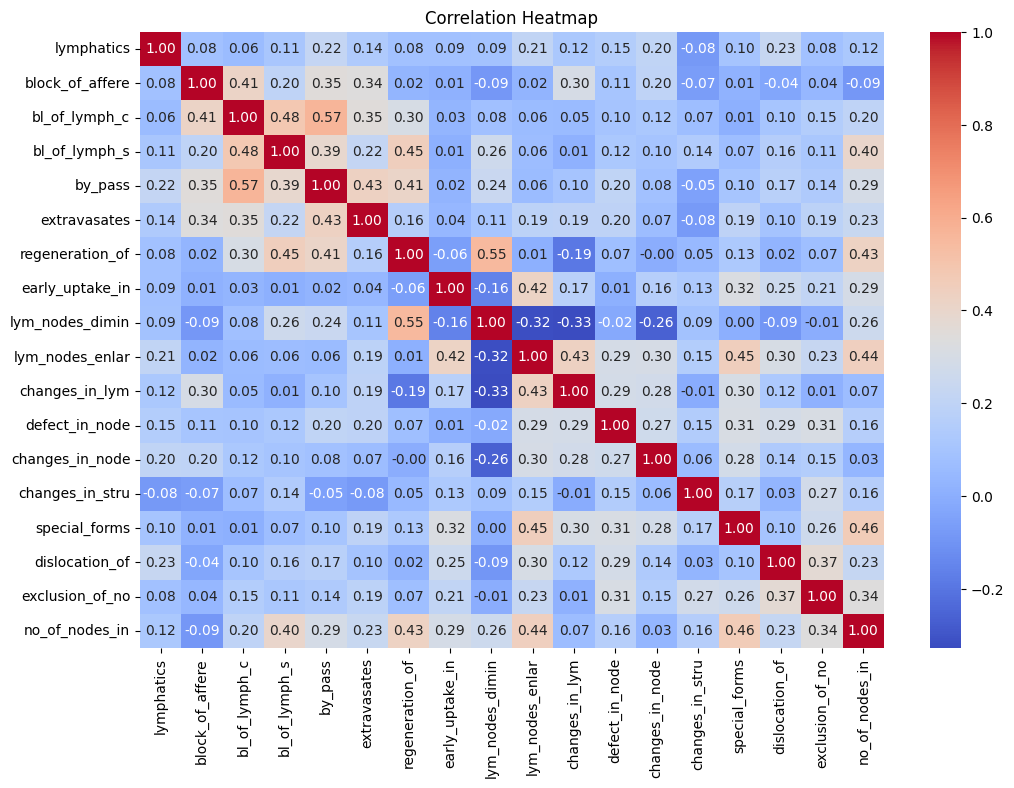

Top 5 Correlated Frequencies with Target/Label:
special_forms      0.461958
lym_nodes_enlar    0.443495
regeneration_of    0.425165
bl_of_lymph_s      0.398857
exclusion_of_no    0.337953
Name: no_of_nodes_in, dtype: float64


In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ds = 'lymphography.data'
column_names = ['lymphatics', 'block_of_affere', 'bl_of_lymph_c', 'bl_of_lymph_s', 'by_pass', 'extravasates', 'regeneration_of', 'early_uptake_in', 'lym_nodes_dimin', 'lym_nodes_enlar', 'changes_in_lym', 'defect_in_node', 'changes_in_node', 'changes_in_stru', 'special_forms', 'dislocation_of', 'exclusion_of_no', 'no_of_nodes_in']
df = pd.read_csv(ds, names=column_names)

corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

target_corr = corr_matrix.iloc[-1].drop('no_of_nodes_in')

top_correlated = target_corr.abs().nlargest(5)
print("Top 5 Correlated Frequencies with Target/Label:")
print(top_correlated)

#### Train | Test Split
TASK: Split the data into features and labels, and then split into a training set and test set, with 90% for Cross-Validation training, and 10% for a final test set.

In [38]:
from sklearn.model_selection import train_test_split

X = df.drop('no_of_nodes_in', axis=1)
y = df['no_of_nodes_in'] 

X_train_cv, X_test, y_train_cv, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_cv, y_train_cv, test_size=0.10, random_state=42)


TASK: Create a PipeLine that contains both a StandardScaler and a KNN model

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

TASK: Perform a grid-search with the pipeline to test various values of k and report back the best performing parameters.

In [35]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9, 11],
    'knn__weights': ['uniform', 'distance']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

c:\Users\Enrico\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best hyperparameters: {'knn__n_neighbors': 9, 'knn__weights': 'uniform'}


(HARD) TASK: Using the .cv_results_ dictionary, see if you can create a plot of the mean test scores per K value.

c:\Users\Enrico\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


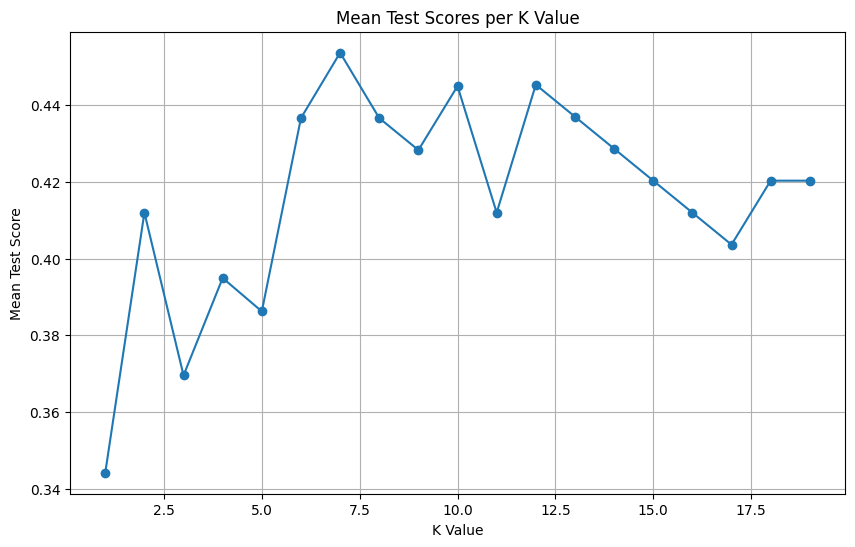

In [34]:
import numpy as np

param_grid = {'n_neighbors': np.arange(1, 20)}
knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

mean_test_scores = grid_search.cv_results_['mean_test_score']
k_values = np.arange(1, 20)

plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_test_scores, marker='o')
plt.xlabel('K Value')
plt.ylabel('Mean Test Score')
plt.title('Mean Test Scores per K Value')
plt.grid(True)
plt.show()

#### Final Model Evaluation
TASK: Using the grid classifier object from the previous step, get a final performance classification report and confusion matrix.

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = grid_search.predict(X_val)

classification_rep = classification_report(y_val, y_pred, zero_division=0)
print("Classification Report:\n", classification_rep)

conf_matrix = confusion_matrix(y_val, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

Classification Report:
               precision    recall  f1-score   support

           1       0.40      1.00      0.57         4
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1

    accuracy                           0.29        14
   macro avg       0.07      0.17      0.10        14
weighted avg       0.11      0.29      0.16        14


Confusion Matrix:
 [[4 0 0 0 0 0]
 [4 0 0 0 0 0]
 [2 1 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [0 1 0 0 0 0]]
